Forecasting stock prices using Technical indicators

The process of predicting stock prices can involve analyzing several factors, such as price trends, benchmark indices, volatility, and moving averages. By analyzing these factors, we can make informed predictions about the future movements of a stock's price.

One factor to consider is the price trend of the stock. This involves examining historical price data to identify patterns and trends in the price movements. If the stock has a consistent upward or downward trend, we can use this information to make predictions about future price movements.

Another factor to consider is the performance of benchmark indices. Benchmark indices represent the overall performance of the stock market and can be used to identify broader trends in the market. By comparing a stock's performance to that of the benchmark indices, we can gain insights into how the stock is likely to perform in the future.

Volatility is another important factor to consider when forecasting stock prices. Volatility refers to the degree of fluctuation in a stock's price over a given period. If a stock is highly volatile, its price is likely to experience more significant fluctuations, making it more challenging to predict its future movements accurately.

Finally, we can use moving averages to analyze historical price data and identify trends in the stock's price movements. Moving averages smooth out fluctuations in price data and can help us identify long-term trends in a stock's price movements.

By analyzing these factors, we can make informed predictions about the future movements of a stock's price.

Through the Yahoo Finance API, we are obtaining data on stock prices. The next step is data cleaning and preparation. The data may be of different quality, for example, there may be missing values, the data may be in incorrect format or with different scales. Therefore, we need to ensure that the data is suitable for our analysis.

The code selects only the necessary columns from the data, removes missing values from the data, and converts the data into a NumPy array. Using a NumPy array can be convenient as it allows for fast computation and data processing. Printing the obtained data is simply to ensure that we have received the correct data and that the data is suitable for analysis.

The technical indicators and their corresponding values that support the rise of a security (opposite for a decline) are:

    1. Market indices are in an uptrend, especially those strongly correlated with the security.
    2. The security itself is in an uptrend.
    3. The volatility of the security is low, especially if it is below a certain level.
    4. The price of the security is higher than its respective moving average.
    5. The trend of the respective moving average is upward.

The corresponding technical indicators need to be fine-tuned for each different security.

Through the Yahoo Finance API, we retrieve data on stock prices. The next step is to clean and prepare the data. The data may vary in quality, for example, there may be missing values, the data may be in incorrect format or have different scales. Therefore, we need to ensure that the data is suitable for our analysis.

The code selects only the necessary columns from the data, removes missing values, and converts the data into a NumPy array. Using a NumPy array can be convenient because it allows for fast computation and data manipulation. Outputting the obtained data is simply to ensure that we have received the correct data and the data is suitable for analysis.

In [2]:
beginning = "2019-01-01"
end = "2024-01-25"
code = "AAPL"

In [3]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Load data using Yahoo Finance API
data = yf.download(code, start=beginning, end=end)

#Select only necessary columns
data = data[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]

#Remove missing values from the data
data = data.dropna()

#Convert data into a NumPy array
X = np.array(data)

#Display the structure of the data
print(X.shape)
print(data.head())
print(data.tail())

/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()
[*********************100%%**********************]  1 of 1 completed

(1274, 6)
                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2019-01-02  38.722500  39.712502  38.557499  39.480000  37.893326  148158800
2019-01-03  35.994999  36.430000  35.500000  35.547501  34.118877  365248800
2019-01-04  36.132500  37.137501  35.950001  37.064999  35.575382  234428400
2019-01-07  37.174999  37.207500  36.474998  36.982498  35.496204  219111200
2019-01-08  37.389999  37.955002  37.130001  37.687500  36.172874  164101200
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-01-18  186.089996  189.139999  185.830002  188.630005  188.630005   
2024-01-19  189.330002  191.949997  188.820007  191.559998  191.559998   
2024-01-22  192.300003  195.330002  192.259995  193.889999  193.889999   
2024-01-23  195.020004  195.750000  193.830002  195.179993  195.179993   
2024-01

In [4]:
# Major Indices

start_date = beginning
end_date = end

#Load data for S&P 500 Index from 2020-01-01 to 2022-02-28
sp500 = yf.Ticker("^GSPC")
sp500_data = sp500.history(start=start_date, end=end_date)

#Load data for Nasdaq Composite Index
nasdaq = yf.Ticker("^IXIC")
nasdaq_data = nasdaq.history(start=start_date, end=end_date)

#Load data for Dow Jones Industrial Average
dowjones = yf.Ticker("^DJI")
dowjones_data = dowjones.history(start=start_date, end=end_date)

In [5]:
# Adjusting initial values of indices to the stock price using corresponding multipliers
k_sp = sp500_data.iloc[0,3] / data.iloc[0,3]
k_n = nasdaq_data.iloc[0,3] / data.iloc[0,3]
k_dj = dowjones_data.iloc[0,3] / data.iloc[0,3]

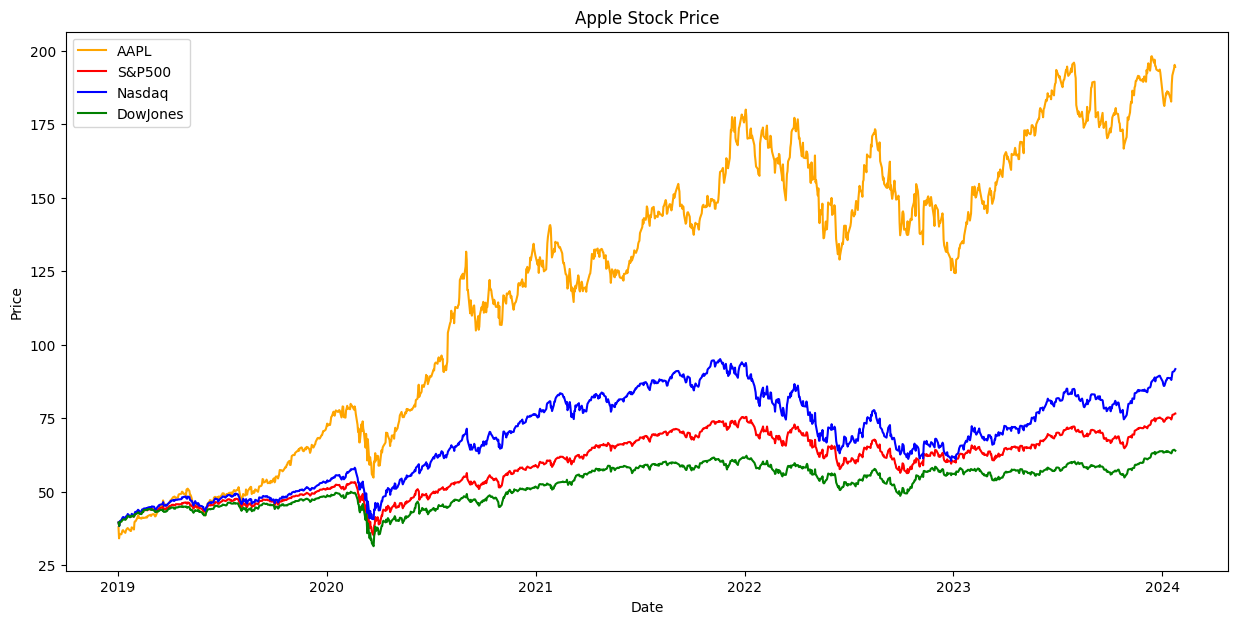

In [6]:
#Plotting simple historical price charts

plt.rcParams["figure.figsize"] = (15,7)
plt.plot(data['Adj Close'],color='orange')
plt.plot(sp500_data['Close']/k_sp,color='red')
plt.plot(nasdaq_data['Close']/k_n,color='blue')
plt.plot(dowjones_data['Close']/k_dj,color='green')
plt.title('Apple Stock Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend([code,'S&P500','Nasdaq','DowJones'])
plt.show()

Moving Average (MA) is a technical analysis indicator that helps smooth out price fluctuations and show the underlying trend over a specified period. It is calculated by adding up a certain number of prices over a given period and dividing the sum by the number of prices in the calculation. As new prices are added, the oldest price is dropped, creating a moving average that "moves" along the price chart. The purpose of the moving average is to identify trend changes and to generate buy or sell signals based on the crossover of the moving average with the price chart. Moving averages are widely used by traders and analysts to help identify support and resistance levels, as well as potential entry and exit points for trades.

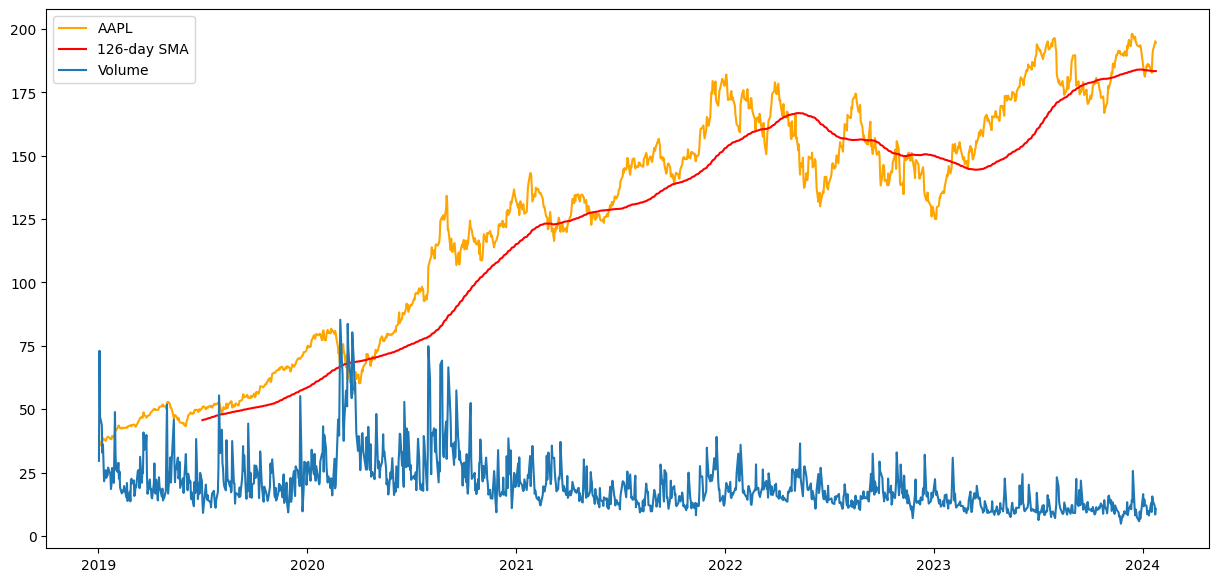

In [7]:
#Calculate the simple moving average for a period of LKD=... days
LKD = 126
sma50 = data["Close"].rolling(window=LKD).mean()

#Plot the graph
plt.plot(data.index, data["Close"],color='orange')
plt.plot(sma50.index, sma50,color='red')
plt.plot(data.index, data["Volume"]/5_000_000)
plt.legend([code, f"{LKD}-day SMA",'Volume'])
plt.show()

Volatility is used as a measure of risk and uncertainty in securities. Mathematically, it is the standard deviation of price changes on an annual basis. Additionally, volatility can create fear and uncertainty among investors, which can affect their investment decisions.

I use ta.volatility.average_true_range, which is a function from TA-Lib (Technical Analysis Library) that allows me to calculate the volatility of a stock price using the ATR (Average True Range) indicator. ATR is a volatility indicator that measures the range of an asset's price movement during each trading period. ATR is typically calculated over the last 14 periods, but I use a longer period.

In [9]:
#!pip install ta

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29413 sha256=639a2fa7bcd155d353d298d83bf7d22ef4adbb69f3e5880fbfa8dd2526e807f1
  Stored in directory: /root/.cache/pip/wheels/5f/67/4f/8a9f252836e053e532c6587a3230bc72a4deb16b03a829610b
Successfully built ta


In [10]:
import ta

# Calculate ATR
data['ATR'] = ta.volatility.average_true_range(data['High'], data['Low'], data['Close'], window=60)

# Print data
print(data.tail())


                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-01-18  186.089996  189.139999  185.830002  188.630005  188.630005   
2024-01-19  189.330002  191.949997  188.820007  191.559998  191.559998   
2024-01-22  192.300003  195.330002  192.259995  193.889999  193.889999   
2024-01-23  195.020004  195.750000  193.830002  195.179993  195.179993   
2024-01-24  195.419998  196.380005  194.339996  194.500000  194.500000   

              Volume       ATR  
Date                            
2024-01-18  78005800  3.142280  
2024-01-19  68741000  3.145241  
2024-01-22  60133900  3.155654  
2024-01-23  42355600  3.135060  
2024-01-24  53631300  3.116809  


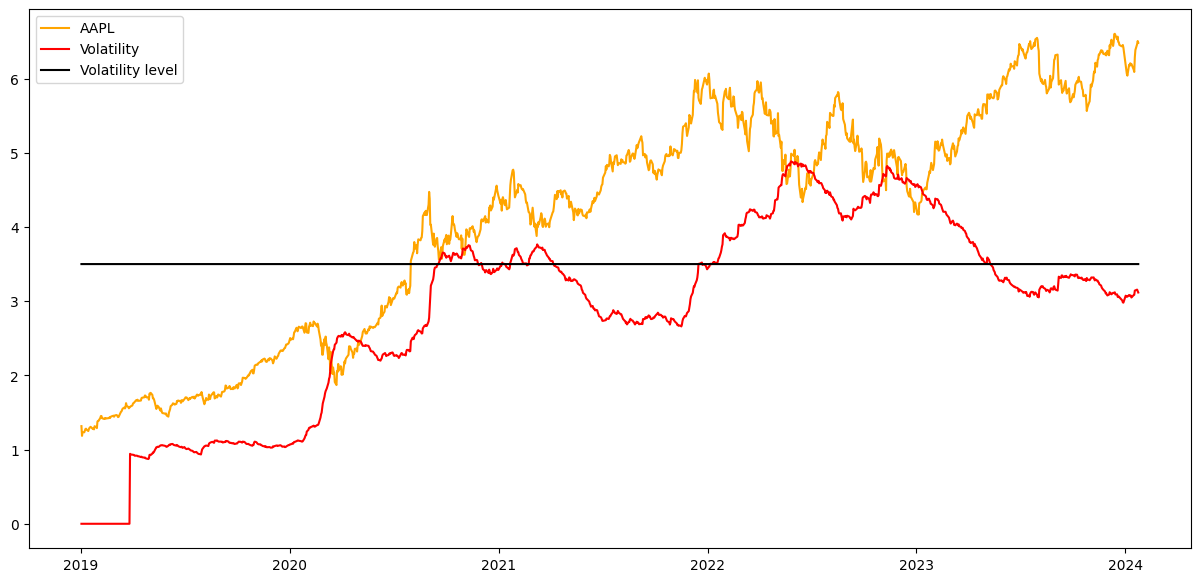

In [11]:
# Plot the graph

plt.plot(data.index, data['Close']/30,color='orange')
plt.plot(data.index, data['ATR'],color='red')
plt.plot(data.index, data['Close']/data['Close']*3.5,color='black')
plt.legend([code,'Volatility','Volatility level'])
plt.show()

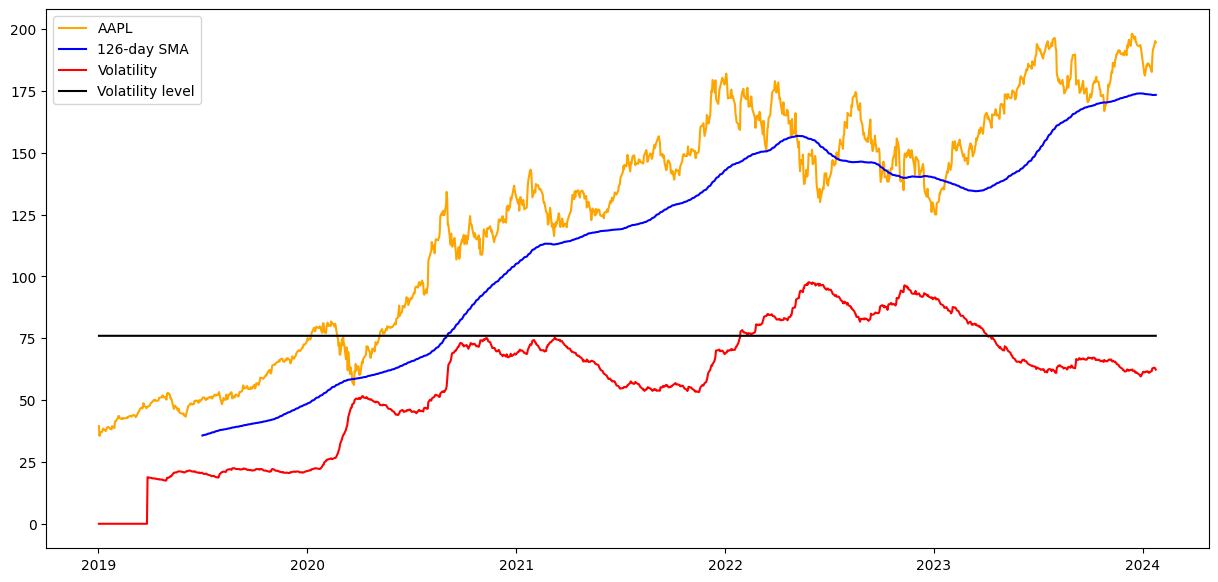

In [12]:
#Plot the graph
factor = 20
volatility_factor = 3.8
sma_shift = -10

plt.plot(data.index, data["Close"],color='orange')
plt.plot(sma50.index, sma50+sma_shift,color='blue')
plt.plot(data.index, data['ATR']*factor,color='red')
plt.plot(data.index, data['Close']/data['Close']*volatility_factor*factor,color='black')
plt.legend([code, f"{LKD}-day SMA",'Volatility','Volatility level'])
plt.show()